<a href="https://colab.research.google.com/github/ShubhamX12/demo/blob/main/POTATO_DISEASE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d emmarex/plantdisease

 96% 629M/658M [00:03<00:00, 220MB/s]
100% 658M/658M [00:03<00:00, 187MB/s]


In [8]:
import zipfile
zip_ref=zipfile.ZipFile("/content/plantdisease.zip","r")
zip_ref.extractall('/content')
zip_ref.close();

In [10]:

!rm -rf /content/PlantVillage/Tomato_Bacterial_spot
!rm -rf /content/PlantVillage/Tomato_Early_blight
!rm -rf /content/PlantVillage/Tomato_Late_blight
!rm -rf /content/PlantVillage/Tomato_Leaf_Mold
!rm -rf  /content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite
!rm -rf  /content/PlantVillage/Tomato__Target_Spot
!rm -rf  /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus
!rm -rf   /content/PlantVillage/Tomato__Tomato_mosaic_virus
!rm  -rf  /content/PlantVillage/Tomato_healthy

!rm -rf   /content/PlantVillage/Tomato_Septoria_leaf_spot

!rm -rf  /content/PlantVillage/Pepper__bell___Bacterial_spot

!rm -rf   /content/PlantVillage/Pepper__bell___healthy



In [44]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [41]:
import tensorflow  as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

from IPython.display import HTML


In [14]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [16]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
len(dataset)

68

In [18]:
for image_batch,label_batch in dataset.take(1):
   print(image_batch.shape)
   print(label_batch.numpy())
   pass

(32, 256, 256, 3)
[1 1 1 0 0 0 1 1 1 1 0 2 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0]


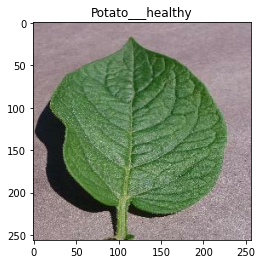

In [19]:
for image_batch,label_batch in dataset.take(1):
   plt.imshow(image_batch[0].numpy().astype("uint8"))
   plt.title(class_names[label_batch[0]]); 

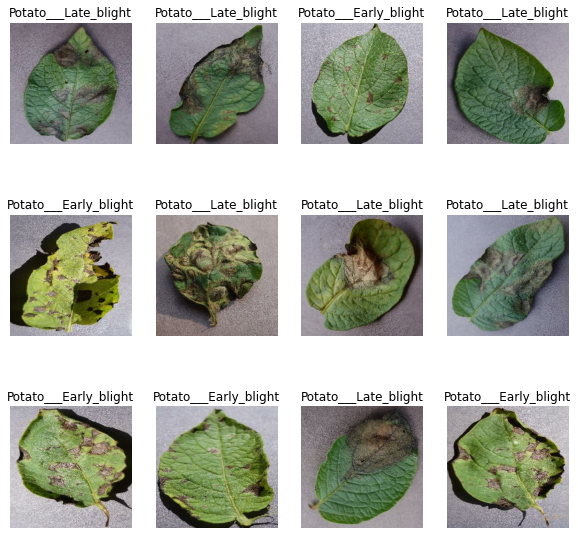

In [20]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
     ax=plt.subplot(3,4,i+1);
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]]); 
     plt.axis("Off");

In [ ]:
80% Training 
20/% :-10 valdidation 10 test

In [22]:
train_size=0.8
print(len(dataset)*train_size);

54.400000000000006


In [23]:
train_ds=dataset.take(54)
print(len(train_ds))

54


In [24]:
test_ds=dataset.skip(54)
print(len(test_ds))

14


In [25]:
val_size=0.1
print(len(dataset)*val_size)

6.800000000000001


In [26]:
val_ds=test_ds.take(6);
print(len(val_ds))

6


In [27]:
test_ds=test_ds.skip(6)
print(len(test_ds))

8


In [28]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
         ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_da=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds;

In [29]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset);

In [30]:
len(train_ds)

54

In [31]:
len(val_ds)

6

In [32]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [34]:
data_arugmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

MODEL GENGERATOR:CNN 

In [37]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3;
model=models.Sequential([
    resize_and_rescale,
    data_arugmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),    #
    layers.Dense(64,activation='relu'),# Dense neuron layers.
    layers.Dense(n_classes,activation='softmax'), #number of class neuron is added & softmax model normalize probablity of model


])
model.build(input_shape=input_shape)

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [49]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/10
54/54 [==============================] - 9s 125ms/step - loss: 0.1268 - accuracy: 0.9583 - val_loss: 0.0894 - val_accuracy: 0.9635
Epoch 2/10
54/54 [==============================] - 8s 124ms/step - loss: 0.1364 - accuracy: 0.9489 - val_loss: 0.0856 - val_accuracy: 0.9792
Epoch 3/10
54/54 [==============================] - 8s 124ms/step - loss: 0.1700 - accuracy: 0.9396 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 4/10
54/54 [==============================] - 9s 125ms/step - loss: 0.1089 - accuracy: 0.9607 - val_loss: 0.1541 - val_accuracy: 0.9375
Epoch 5/10
54/54 [==============================] - 8s 124ms/step - loss: 0.0903 - accuracy: 0.9683 - val_loss: 0.1091 - val_accuracy: 0.9740
Epoch 6/10
54/54 [==============================] - 8s 125ms/step - loss: 0.0913 - accuracy: 0.9665 - val_loss: 0.0694 - val_accuracy: 0.9792
Epoch 7/10
54/54 [==============================] - 9s 132ms/step - loss: 0.0810 - accuracy: 0.9683 - val_loss: 0.0970 - val_accuracy: 0.9531
Epoch 

In [47]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 2s 35ms/step - loss: 0.1307 - accuracy: 0.9440


In [ ]:
scores

In [50]:
history

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Trainning and Validation accuracy')

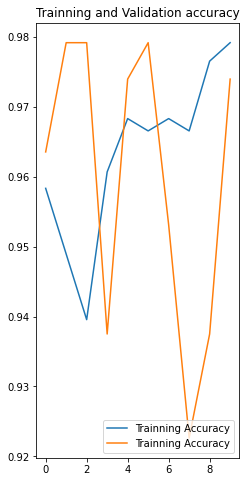

In [54]:
#plot the image into matpoltib
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Trainning Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Trainning Accuracy")
plt.legend(loc='lower right')
plt.title("Trainning and Validation accuracy")


In [ ]:
#TEST MODE  

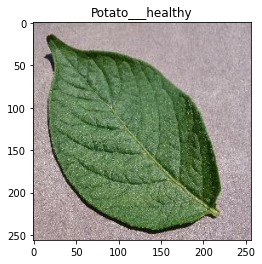

In [59]:
for images_batch,labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[0].numpy()])

In [63]:
#MODEL PREDICT:
import numpy as np

first image to actual predict
1/1 [==============================] - 0s 29ms/step
Potato___Early_blight


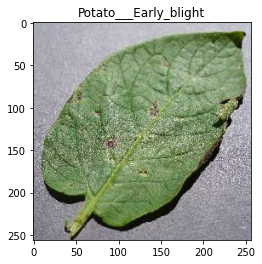

In [65]:
for images_batch,labels_batch in test_ds.take(1):
  
    print("first image to actual predict");
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[0].numpy()]) 

    batch_predication=model.predict(images_batch)
    print(class_names[np.argmax(batch_predication[0])])

In [ ]:
# MODEL PREDICT ACURACY

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


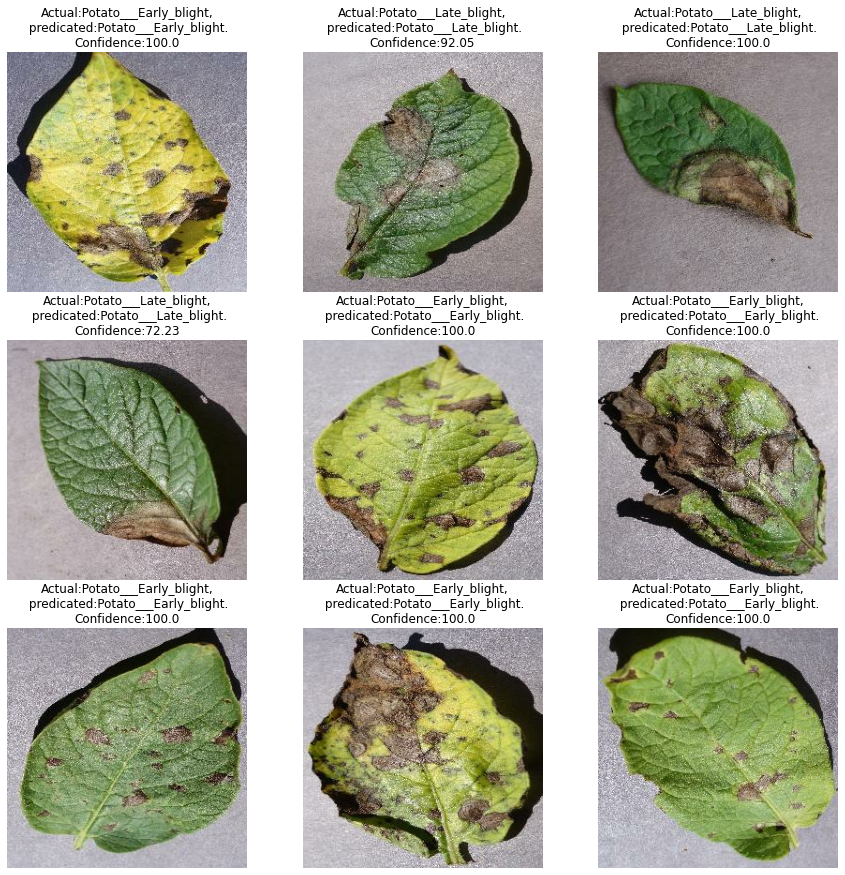

In [70]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
       ax=plt.subplot(3,3,i+1)
       plt.imshow(images[i].numpy().astype("uint8"))
       predicted_class, confidence=predict(model,images[i].numpy())
       actual_class=class_names[labels[i]]
       plt.title(f"Actual:{actual_class},\n predicated:{predicted_class}.\nConfidence:{confidence}")
       plt.axis("off")

In [75]:
model_version=1
model.save("D:\model\{model_version}")

In [77]:
from google.colab import drive

model_version=1
model.save("/content/drive/MyDrive/Potato_Dieases Detection_model/{model_version}")
